In [1]:
import numpy as np
import FunctionCollection as fc
import matplotlib.pyplot as plt
import os
import sqlite3
import pandas as pd

In [2]:
path = r'C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning'

# filepath = os.path.join(path,'raw_data/dev_level7_mu_e_tau_oscweight_000/data')
# filename = 'dev_level7_mu_e_tau_oscweight_000_unscaled.db'

filepath = os.path.join(path,'raw_data')
filename = 'rasmus_classification_muon_3neutrino_3mio.db'

with sqlite3.connect(os.path.join(filepath,filename)) as con:
    query = "SELECT azimuth, zenith FROM truth WHERE pid in (-13,13)"
    y = pd.read_sql(query,con)

In [3]:
tf = pd.read_pickle(r'C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\datasets\transformers.pkl')
az = tf['truth']['azimuth'].inverse_transform(y.azimuth.to_numpy().reshape(-1,1)).flatten()
ze = tf['truth']['zenith'].inverse_transform(y.zenith.to_numpy().reshape(-1,1)).flatten()

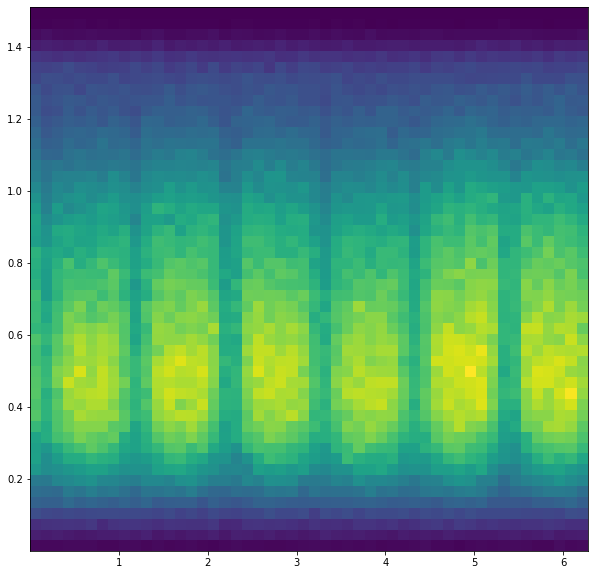

In [4]:
fig, ax = plt.subplots(figsize=(10,10))

h = ax.hist2d(az,ze,bins=50);
# ax.hist(y.azimuth,bins=500);

In [79]:
from hep_ml import reweight
bins_reweighter = reweight.BinsReweighter(n_bins=280, n_neighs=2.) #, n_neighs=1.
# bins_reweighter = reweight.GBReweighter(n_estimators=100,max_depth=5)
# help(reweight.GBReweighter)

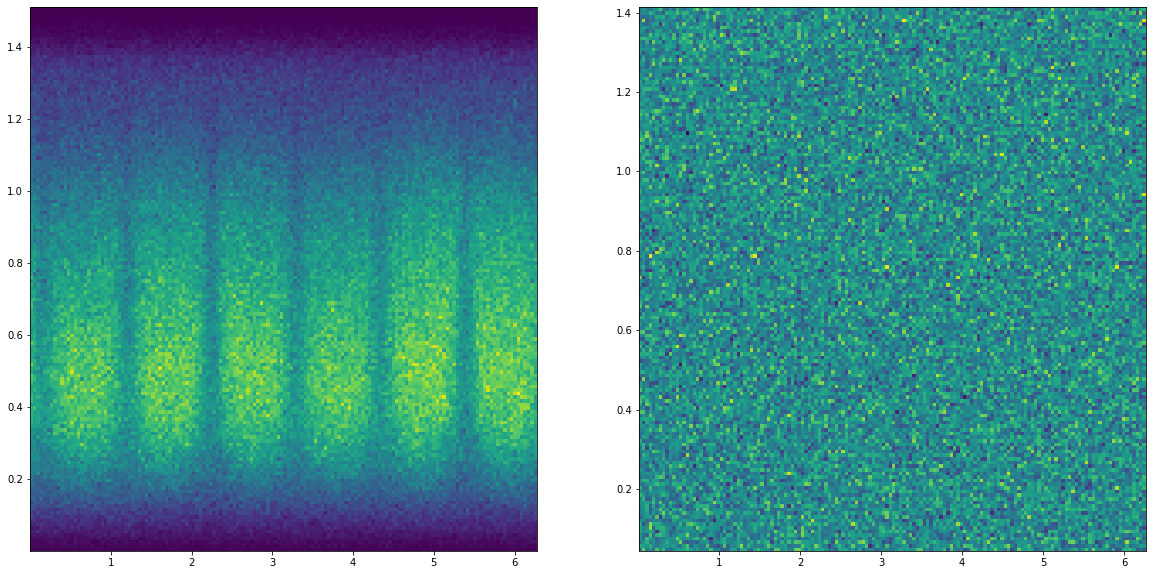

In [58]:
X = np.append(az.reshape(-1,1),ze.reshape(-1,1),axis=1)
Y = np.random.uniform(*[*np.quantile(X,(0.002,0.998),axis=0)],X.shape)

fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(X[:,0],X[:,1],bins=150);
ax[1].hist2d(Y[:,0],Y[:,1],bins=150);

In [80]:
bins_reweighter.fit(X,Y)
# import dill
# with open('AzZe_Muon_bin_reweighter.pkl','rb') as file:
#     bins_reweighter = dill.load(file)
w = bins_reweighter.predict_weights(X)

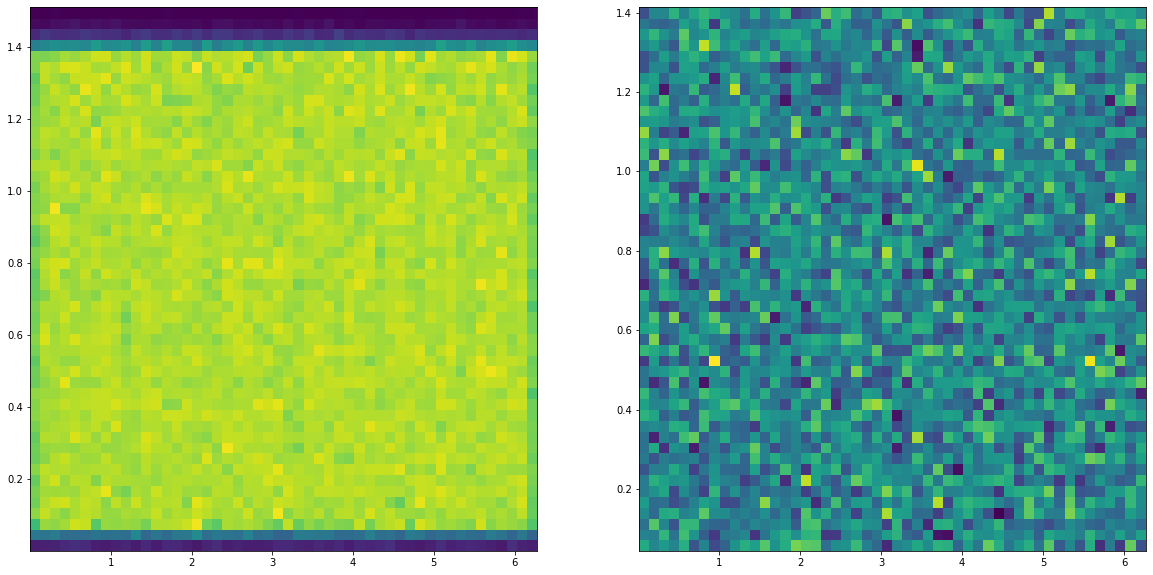

In [81]:
fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(X[:,0],X[:,1],bins=50,weights=w);
ax[1].hist2d(Y[:,0],Y[:,1],bins=50);

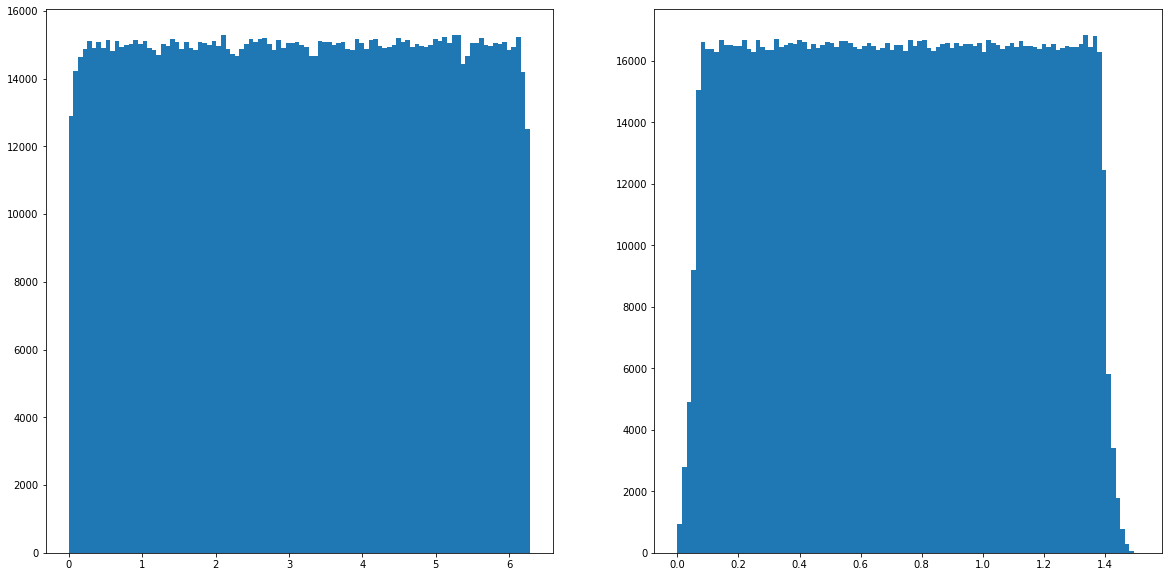

In [82]:
fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist(az,bins=100,weights=w);
ax[1].hist(ze,bins=100,weights=w);

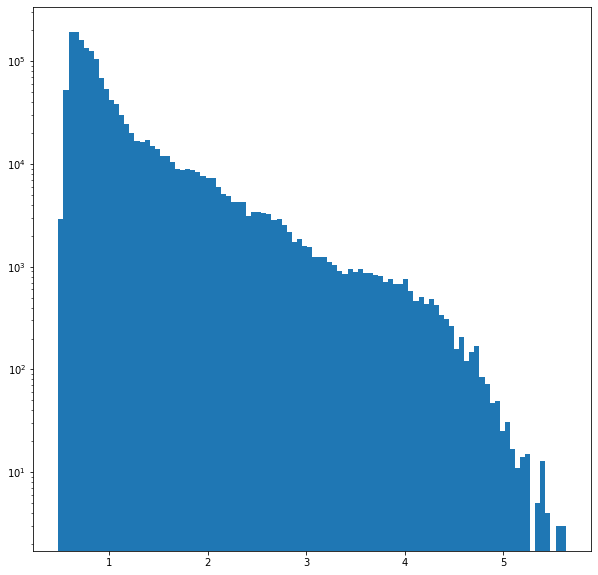

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(w,bins=100);
ax.set_yscale('log')

In [84]:
import dill
help(dill.dump)

filename = 'AzZe_Muon_bin_reweighter.pkl'
dill.dump(bins_reweighter, open(filename, 'wb'),recurse=True)

Help on function dump in module dill._dill:

dump(obj, file, protocol=None, byref=None, fmode=None, recurse=None, **kwds)
    pickle an object to a file



In [ ]:
from hep_ml import reweight
b_rw_az = reweight.BinsReweighter(n_bins=50, n_neighs=1.)
b_rw_ze = reweight.BinsReweighter(n_bins=50, n_neighs=1.)